# Airline Analysis
In this project, we’ll imagine that we work for a travel agency and need to know the ins and outs of airline prices for our clients. You want to make sure that we can find the best deal for your client and help them to understand how airline prices change based on different factors.

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('flights.csv')
df.head()

,miles,passengers,delay,inflight_meal,inflight_entertainment,inflight_wifi,day_of_week,redeye,weekend,coach_price,firstclass_price,hours
0,792,172,0,No,Yes,Yes,Sunday,Yes,Yes,338.820,1571.02,1
1,3163,214,0,No,Yes,Yes,Sunday,No,Yes,472.655,1663.70,6
2,1832,212,0,No,Yes,No,Friday,No,Yes,351.960,1429.86,3
3,925,213,0,No,Yes,Yes,Saturday,No,Yes,387.835,1558.76,2
4,967,217,0,Yes,Yes,Yes,Monday,No,No,374.735,1245.58,2


# Visualizaion 1
# Univariate Analysis


What do coach ticket prices look like? What are the high and low values? What would be considered average? Does $500 seem like a good price for a coach ticket?

Mean of coach Price is 376.5852530821279
Median of coach Price is 380.56


Text(0.5, 1.0, 'Coach Price Distribution.')

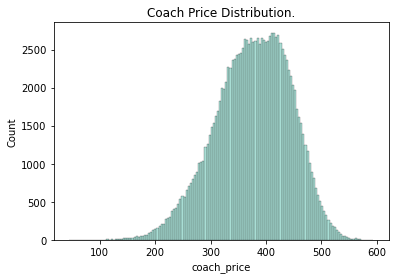

In [3]:
print('Mean of coach Price is',np.mean(df.coach_price))
print('Median of coach Price is',np.median(df.coach_price))

sns.set_palette('Set3')
sns.histplot(df.coach_price)
plt.title('Coach Price Distribution.')

# Analysis

Coach Price seams like it is well distributed with 100 lowest and 550 highest price . 

Coach Price have a Average value of 377.

$500 seams like a high price considering 380 is the median price for the coach ticket.

# Visualization 2

What are the high, low, and average prices for 8-hour-long flights? Does a $500 ticket seem more reasonable than before?

Mean of coach Price in 8 hour long flight 431.8343773728164
Median of coach Price in 8 hour long flight 437.115


Text(0.5, 1.0, 'Coach Price Distribution in 8 hour long flight.')

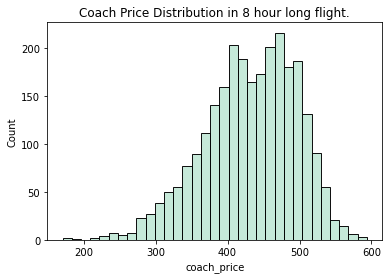

In [4]:
flights_8hours = df[df.hours >= 8]
print('Mean of coach Price in 8 hour long flight',np.mean(flights_8hours.coach_price))
print('Median of coach Price in 8 hour long flight',np.median(flights_8hours.coach_price))

sns.set_palette('Pastel2')
sns.histplot(flights_8hours.coach_price)
plt.title('Coach Price Distribution in 8 hour long flight.')

# Analysis

Coach Price in 8 Hour long flight seams like it is well distributed with 200 lowest and 600 highest price . 

Coach Price have a Average value of 430.

$500 seams like a resonable price considering 437 is the median price for the coach ticket.

# Visualization 3


How are flight delay times distributed? What kinds of delays are typical?

In [5]:
print(df.delay.unique())

[   0    9   12    5   13    6   11   10    8   17   14    7    3   16
   15    4    2   18   40   20   32   31   26   21   37   27   24   29
   28   19   22   33   43   34   23   30   35   44   38   39   25   42
   45   36   47   41   46    1   50   48   51   49   54   53   58   52
 1515 1484 1498 1519 1446 1506 1473 1509 1560 1488 1512 1503 1500 1496
 1476 1536 1524 1497 1468 1532 1479 1489 1493 1495 1518 1525 1513 1522
 1494 1504 1462 1510 1492 1501 1499 1521 1508 1480 1482 1472 1491 1514
 1507 1459 1467 1528 1469 1475 1533 1477 1483 1487 1530 1481 1490]


Mean of Delay Counts is 12.018530228254164
Median of Delay Counts is 10.0


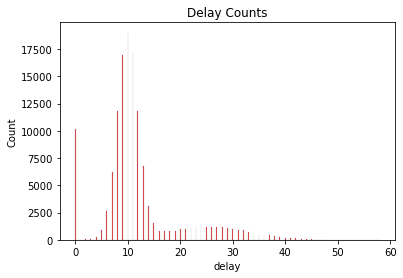

In [6]:
print('Mean of Delay Counts is',np.mean(df[df.delay < 1000].delay))
print('Median of Delay Counts is',np.median(df[df.delay < 1000].delay))
sns.set_palette('Set1')
sns.histplot(x='delay',data=df[df.delay < 1000])
plt.title('Delay Counts')
plt.show()


# Analysis

After subsetting the data by delay times, we can see that a 10-minute delay is fairly common for this airline. we will want to keep that in consideration when setting up a connecting flight.

# Bivariate Analysis
# Visualization 4

What is the relationship between coach prices and first-class prices? Do flights with higher coach prices always have higher first-class prices as well?

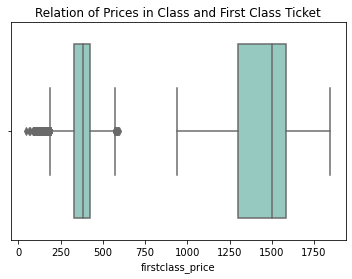

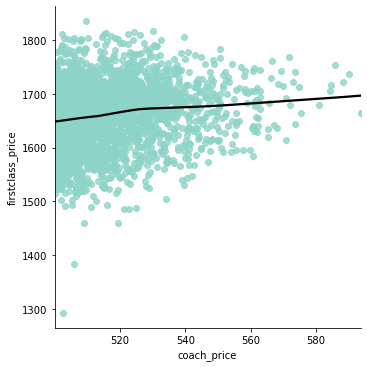

In [7]:
sns.set_palette('Set3')
sns.boxplot(x='coach_price',data=df)
sns.boxplot(x= 'firstclass_price',data=df)
plt.title('Relation of Prices in Class and First Class Ticket')
sns.lmplot(x = 'coach_price', y = 'firstclass_price', data = df[df.coach_price > 500], line_kws={'color': 'black'}, lowess=True)
plt.show()


# Analysis
Class Tickets starts from 100 to 600 while first class ticket starts from 800 to 1850 .

Flights with higher coach prices do not always have higher first-class prices.

# Visualization 5

What is the relationship between coach prices and inflight features— inflight meal, inflight entertainment, and inflight WiFi? Which features are associated with the highest increase in price?

Text(0.5, 1.0, 'Relation of coach price and Inflight Meal')

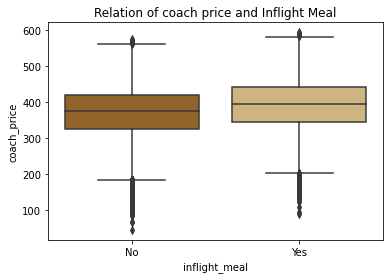

In [8]:
sns.set_palette('BrBG')
sns.boxplot(x='inflight_meal',y='coach_price',data=df)
plt.title('Relation of coach price and Inflight Meal')

Text(0.5, 1.0, 'Relation of coach price and Inflight Entertainment')

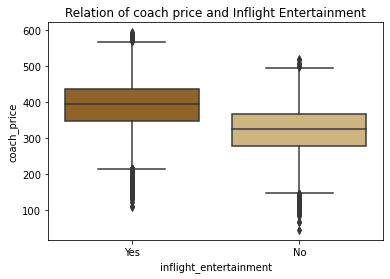

In [9]:
sns.boxplot(x='inflight_entertainment',y='coach_price',data=df)
plt.title('Relation of coach price and Inflight Entertainment')

Text(0.5, 1.0, 'Relation of coach price and Inflight Wifi')

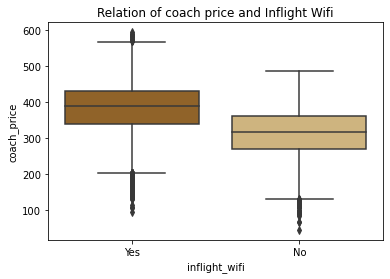

In [10]:
sns.boxplot(x='inflight_wifi',y='coach_price',data=df)
plt.title('Relation of coach price and Inflight Wifi')

# Analysis

Inflight Meal seams to be same in all Prices.

While Entertainment and Wifi are associated with the highest increase in price.

# Visualization 6


How does the number of passengers change in relation to the length of flights?

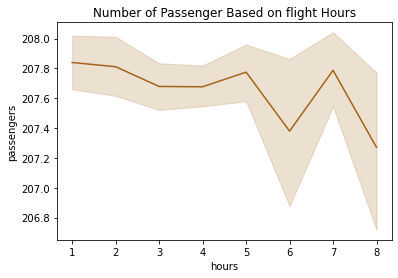

In [11]:
sns.lineplot(x='hours',y='passengers',data=df)
plt.title('Number of Passenger Based on flight Hours')
plt.show()

# Analysis
One thing you might notice at this point is that there are significantly fewer data points at 6 and 8 hours compared to the other hours.

Another thing we might notice is that there is a break in the distribution of passengers around 180 (very few flights have around 180 passengers).

# Multivariate Analysis
# Visualization 7

The relationship between coach and first-class prices on weekends compared to weekdays.

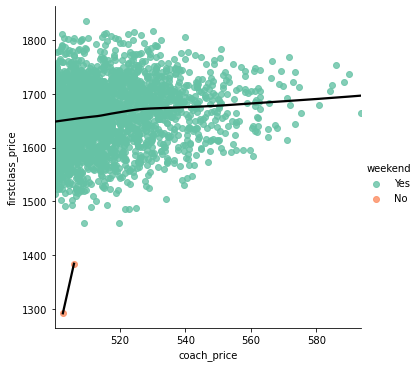

In [15]:
sns.set_palette('Set2')
sns.lmplot(x = 'coach_price', y = 'firstclass_price',hue='weekend', data = df[df.coach_price > 500], line_kws={'color': 'black'}, lowess=True)
plt.show()

# Analysis

We can see that on average, weekend tickets are more expensive than weekday tickets. However, based on this plot it seems like it’s easier to get a good deal on a first-class ticket on a weekday than on a weekend: the price difference between first-class and coach level tickets is larger on the weekend than on a weekday.

# Visualization 8


How do coach prices differ for redeyes and non-redeyes on each day of the week?

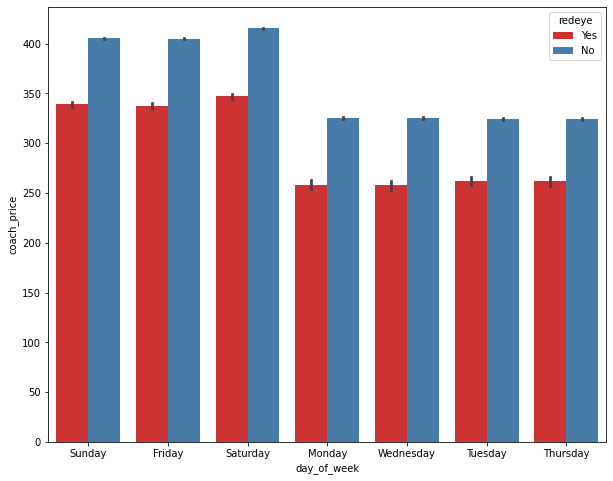

In [20]:
plt.figure(figsize=(10,8))
sns.set_palette('Set1')

sns.barplot(x = 'day_of_week',y='coach_price', hue='redeye', data = df)
plt.show()

# Analysis

We can see more clearly that the difference between redeyes and non-redeyes is pretty much the same on any day of the week, though on average weekend flights cost more than weekday flights.